In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
pd.options.display.float_format = '{:.6f}'.format

In [3]:
water_data = pd.read_csv('water_data_outlier_cleaned.csv')

In [4]:
model = joblib.load('RandomForest_WQT_NO_OL.joblib')

In [5]:
X = water_data.drop('Target', axis = 1)
y = water_data['Target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [7]:
importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                   Feature  Importance
0                       pH    0.162830
10                    Odor    0.128815
3                 Chloride    0.104557
12                Chlorine    0.078999
9                   Copper    0.078205
14  Total Dissolved Solids    0.077295
2                  Nitrate    0.062777
7                Turbidity    0.056708
8                 Fluoride    0.054958
11                 Sulfate    0.049534
6                    Color    0.045002
13               Manganese    0.034521
5                     Zinc    0.033681
1                     Iron    0.030931
4                     Lead    0.001186


In [8]:
# Extracting feature importances
importances = model.feature_importances_

# Associating importances with feature names
feature_names = X_train.columns  # If you're using a DataFrame
importance_dict = dict(zip(feature_names, importances))

# Sorting the features by importance
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

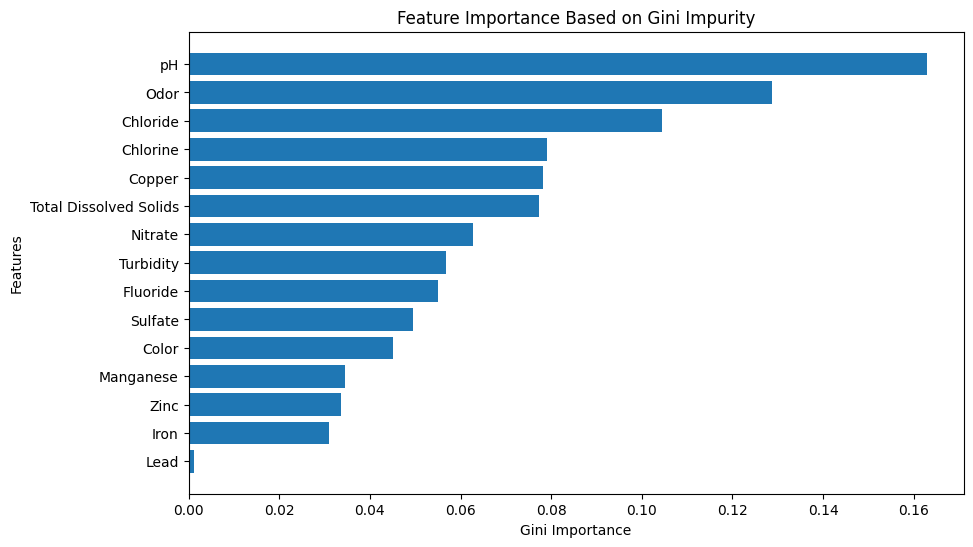

In [9]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on Gini Impurity')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

TypeError: got an unexpected keyword argument 'ax'

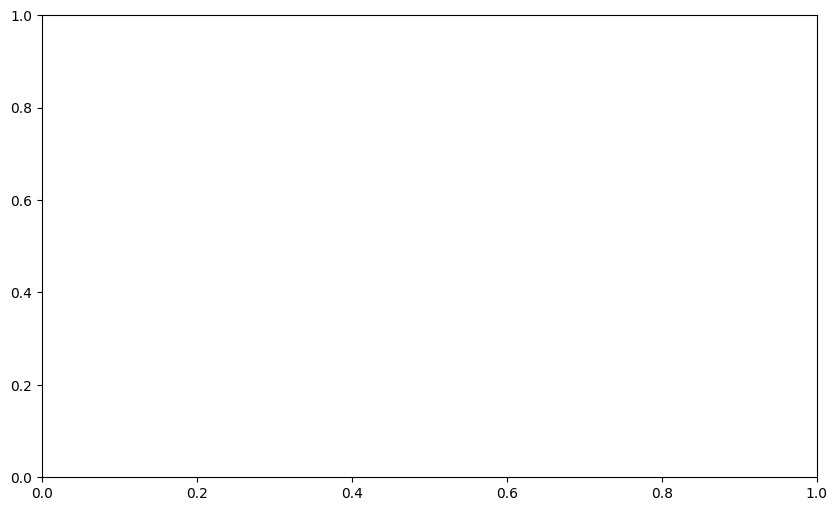

In [10]:
from sklearn.inspection import partial_dependence

# Assuming `model` is your trained RandomForestClassifier and `X_train` is your training data
features = list(range(len(X_train.columns)))  # Indices of features

# Plot partial dependence
fig, ax = plt.subplots(figsize=(10, 6))
partial_dependence(model, X_train, features, ax=ax)
plt.show()


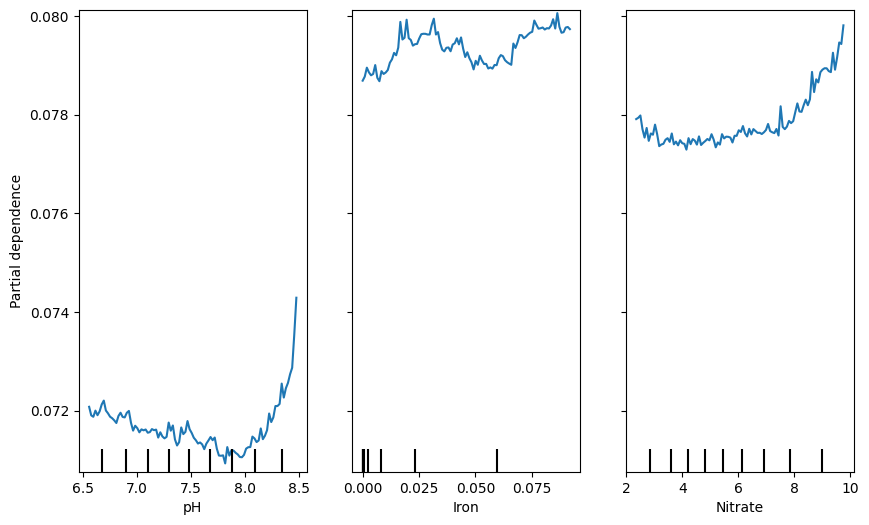

In [12]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# List the specific features you want to plot (e.g., first three)
features_to_plot = [0, 1, 2]  # Modify this to the indices or names of the features you want to plot

# Create the partial dependence plot
fig, ax = plt.subplots(figsize=(10, 6))

# Use `PartialDependenceDisplay.from_estimator` to plot partial dependence
display = PartialDependenceDisplay.from_estimator(
    model,          # Your trained RandomForestClassifier model
    X_train,        # Your training data
    features_to_plot,  # The features to plot (can be indices or column names)
    ax=ax           # Axes to plot on
)

plt.show()



In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP values for class 1 (potable water)
shap.summary_plot(shap_values[1], X_train)


In [9]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode='classification')
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_train.values[i], model.predict_proba)

# Plot the explanation
exp.as_pyplot_figure()


ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.

In [10]:
# Assuming `y_train` is the target variable and `X_train` is the feature matrix
potable_data = X_train[y_train == 1]  # Data where target is potable
non_potable_data = X_train[y_train == 0]  # Data where target is non-potable

# Print statistics or sample values
print("Potable Data Statistics:")
print(potable_data.describe())

print("Non-Potable Data Statistics:")
print(non_potable_data.describe())


Potable Data Statistics:
                 pH          Iron       Nitrate      Chloride           Lead  \
count  31359.000000  3.166100e+04  31393.000000  31062.000000   3.173600e+04   
mean       7.410678  5.657110e-02      6.333988    194.157908   4.666907e-04   
std        1.071155  3.066336e-01      3.051263     68.530893   1.620300e-02   
min        3.116076  7.180000e-33      0.489146     37.750581   0.000000e+00   
25%        6.603043  3.360000e-06      4.041251    142.988920  1.445000e-142   
50%        7.393055  8.043740e-04      5.800040    185.941865   2.400000e-83   
75%        8.209401  1.827310e-02      8.148090    238.951496   6.822500e-48   
max       11.935973  1.006269e+01     44.837300   1043.275842   1.551566e+00   

               Zinc         Color     Turbidity      Fluoride        Copper  \
count  31177.000000  31921.000000  3.162300e+04  30957.000000  30887.000000   
mean       1.431587      2.051627  4.389052e-01      1.000336      0.524536   
std        1.3417

In [18]:
for column in X_train.columns:
    print(column)
    print(f"min: {water_data[column].min()}")
    print(f"mean: {water_data[column].mean()}")
    print(f"max: {water_data[column].max()}")
    print("__________________________")
    

pH
min: 2.648814447
mean: 7.471144370064095
max: 11.93597322
__________________________
Iron
min: 2.05e-53
mean: 0.01848744683301275
max: 10.06269499
__________________________
Nitrate
min: 0.286172715
mean: 5.62507820411831
max: 44.83729967
__________________________
Chloride
min: 29.41349666
mean: 170.90007829714466
max: 1043.275842
__________________________
Lead
min: 0.0
mean: 7.273621639790501e-05
max: 3.503947763
__________________________
Zinc
min: 1.14e-06
mean: 1.387033588569054
max: 18.8366145
__________________________
Color
min: 0
mean: 1.5471310700010554
max: 5
__________________________
Turbidity
min: 9.18e-14
mean: 0.294499731341373
max: 18.59262481
__________________________
Fluoride
min: 4.86e-05
mean: 0.8238035219902287
max: 11.47132862
__________________________
Copper
min: 4.44e-08
mean: 0.383523783252324
max: 9.478373057
__________________________
Odor
min: 0.011001253
mean: 1.6625610664027273
max: 4.141952455
__________________________
Sulfate
min: 11.9407271
mean

In [19]:
# Define sample data
data = {
    'pH': [7.2, 8.0, 6.5, 7.5, 5.5, 4.0],
    'Iron': [0.02, 0.03, 0.10, 1.00, 0.50, 2.00],
    'Nitrate': [5.0, 4.0, 10.0, 20.0, 25.0, 30.0],
    'Chloride': [150, 200, 180, 250, 220, 300],
    'Lead': [0.0001, 0.0005, 0.0010, 0.0500, 0.0250, 0.1000],
    'Zinc': [1.0, 2.0, 0.5, 4.0, 3.0, 5.0],
    'Color': [1, 2, 1, 3, 4, 5],
    'Turbidity': [0.1, 0.2, 0.3, 1.0, 0.8, 2.0],
    'Fluoride': [0.5, 0.6, 0.4, 1.0, 1.2, 2.0],
    'Copper': [0.1, 0.2, 0.3, 0.5, 0.6, 1.0],
    'Odor': [1.0, 0.5, 2.0, 3.0, 2.5, 4.0],
    'Sulfate': [100, 120, 150, 200, 170, 250],
    'Chlorine': [3.0, 3.5, 2.0, 4.0, 4.5, 5.0],
    'Manganese': [0.01, 0.02, 0.05, 0.10, 0.15, 0.20],
    'Total Dissolved Solids': [250, 270, 300, 350, 400, 450],
    'Potable': [1, 1, 1, 0, 0, 0]  # 1: Potable, 0: Non-Potable
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('water_data_test.csv', index=False)


In [24]:
def get_user_input():
    inputs = []
    print("Enter the value")

    for feature in X:
        value = float(input(f"Enter {feature}: "))
        inputs.append(value)

    return [inputs]
    

In [25]:
def predictions():
    user_input = get_user_input()

    prediction = model.predict(user_input)
    prediction_proba = model.predict_proba(user_input)
    
    print(f"Prediction: {prediction[0]}")
    print(f"Prediction Probability: {prediction_proba}")

In [ ]:
predictions()